In [1]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from cur import cur_decomposition

In [2]:
# Get the current working directory
cwd = os.getcwd()

# Define file paths with cwd appended
file_path_2b = os.path.join(cwd, "dft_pds/2b_all_pd")
file_path_3b = os.path.join(cwd, "dft_pds/3b_all_pd")
file_path_4b = os.path.join(cwd, "dft_pds/4b_all_pd")
file_path_labels = os.path.join(cwd, "dft_pds/labels_pd")
file_path_natoms = os.path.join(cwd, "test_notebooks/energies_per_atom.txt")

# Open pickle files with the updated file paths
with open(file_path_2b, 'rb') as pickle_file:
    pd_2b = pickle.load(pickle_file)

with open(file_path_3b, 'rb') as pickle_file:
    pd_3b = pickle.load(pickle_file)

with open(file_path_4b, 'rb') as pickle_file:
    pd_4b = pickle.load(pickle_file)

with open(file_path_labels, 'rb') as pickle_file:
    labels = pickle.load(pickle_file)

natom_list = []

# Open the text file for reading
with open(file_path_natoms, 'r') as file:

    # Read the contents of the file
    lines = file.readlines()[1:]

    # Iterate through each line
    for line in lines:

        # Split the line into words
        words = line.split()
        natoms = line.split("|")[1].strip()

        # Extract the last word, assuming it's a number
        last_number = float(words[-1])
        if words[0][-1] == 'z':
            print(words[0])
            continue
        natom_list.append(natoms)

natom_list = np.array(natom_list[:-10])

# Combine the arrays along the second axis (axis=1)
all_array = np.concatenate((pd_2b, pd_3b, pd_4b), axis=2)
all_array = all_array.reshape(-1, all_array.shape[2])
print(np.shape(all_array))
df_fingerprints = pd.DataFrame(all_array)

# Define the column labels for each set of columns
column_labels_2b = [f'2B_{i}' for i in range(60)]
column_labels_3b = [f'3B_{i}' for i in range(60)]
column_labels_4b = [f'4B_{i}' for i in range(60)]

# Assign the column labels to the DataFrame
column_labels = column_labels_2b + column_labels_3b + column_labels_4b
df_fingerprints.columns = column_labels
df_fingerprints = df_fingerprints.fillna(0)

df_fingerprints.head()


training_data_#0000.xyz
training_data_#0050.xyz
training_data_#0055.xyz
training_data_#0060.xyz
training_data_#0075.xyz
training_data_#0080.xyz
training_data_#0110.xyz
(300, 180)


,2B_0,2B_1,2B_2,2B_3,2B_4,2B_5,2B_6,2B_7,2B_8,2B_9,...,4B_50,4B_51,4B_52,4B_53,4B_54,4B_55,4B_56,4B_57,4B_58,4B_59
0,0.151940,0.079974,0.039987,0.134957,0.000000,0.039987,0.000000,0.059981,0.000000,0.064979,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.151838,0.089548,0.030670,0.107863,0.026939,0.039628,0.000530,0.059527,0.008709,0.053400,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.152059,0.091794,0.027968,0.104630,0.029103,0.039305,0.001128,0.058054,0.005966,0.057973,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.113888,0.093885,0.074372,0.063481,0.048075,0.037675,0.033869,0.031662,0.025958,0.021373,...,3.428950e-07,2.914880e-08,1.834990e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.118745,0.094125,0.073008,0.061039,0.048168,0.036493,0.032401,0.030655,0.026413,0.021867,...,4.734280e-07,2.891710e-08,2.491420e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Convert DataFrame to a numerical matrix (NumPy array)
M = df_fingerprints.to_numpy()
r = 200
C, U, R = cur_decomposition(M, r)

In [32]:
# Calculate Euclidean distance between the given row and each row in the DataFrame
distances = df_fingerprints.apply(lambda x: np.linalg.norm(x.values - R[0]), axis=1)

# Find the index of the row with the minimum distance
most_similar_index = distances.idxmin()

print("Index of the row most similar to the given row:", most_similar_index)
print("Most similar row:", df_fingerprints.iloc[most_similar_index])

Index of the row most similar to the given row: 236
Most similar row: 2B_0     1.098670e-01
2B_1     7.647960e-02
2B_2     6.845290e-02
2B_3     7.126630e-02
2B_4     6.270570e-02
             ...     
4B_55    4.671010e-08
4B_56    2.349740e-09
4B_57    0.000000e+00
4B_58    0.000000e+00
4B_59    0.000000e+00
Name: 236, Length: 180, dtype: float64


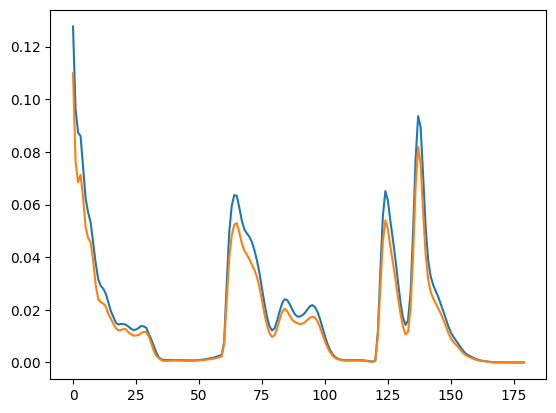

In [33]:
plt.plot(R[0])
plt.plot(M[most_similar_index])